# TOPIC MODELLING ON AUDIO 

## Audio file conversion to text 

In [13]:
import speech_recognition as sr
import pyaudio
import matplotlib.pyplot as plt
import numpy as np

In [14]:
r = sr.Recognizer()

In [15]:
mic=sr.Microphone()

### English File

In [21]:
eng_file = sr.AudioFile('eng_file.wav')

In [23]:
with eng_file as source:
    r.adjust_for_ambient_noise(source)
    audio = r.record(source )

In [28]:
text_eng=r.recognize_google(audio)

In [29]:
print(text_eng)

newspaper on the smooth bike seat without play background 2008 available please say it again I get over this price is after insert in Rampur to juice of lemons mix. 500 Park source on the side effects up to how to search quilling art for the study works based advertising starting is heart sound


### Hindi audio file 

In [30]:
hindi_file= sr.AudioFile('hindi_file.wav')

In [31]:
with hindi_file as source:
    audio = r.record(source)

In [35]:
text=r.recognize_google(audio)

In [36]:
print(text)

Keshav ke ghar mein Char khidkiyan Hain Kai log Kumar ko Pasand Karte Hain Tumhare khargosh Ka Rang Safed hai aapki gacrkl se yahan hai kal ka khana Sulekha ki lalkar banayegi Akshay ki Kheer Garam Ho Gayi Main Kal Khwab Mein Ek Khubsurat gadi Dekhe Ja Khabar sunkar Raghu Khushi Se Pagal Ho Gaya Khud Ki Ladai Mein Kaisi Jawani Ghayal Hue kakahi ke aage Gori chal rahi hai kaisa non pahle Sita Ki Agni Pariksha hui thi aap Ki Khoj mein kaun sa Ghoda Shamil Karen Aap Ki Dua Se Sab khairiyat Hai is varsh jansankhya ki Jayanti Mein dialogue chhut Gaye Mausam badalne par mere khoon mein Dard shuru ho jata hai Gumnaam logo ko gairon se kaha ki Asha Nahin Karni chahiye


In [37]:
import goslate

In [38]:
gs = goslate.Goslate()
language_id = gs.detect(text)
gs.get_languages()[language_id]

'Hindi'

In [39]:
text_hindi=r.recognize_google(audio , language='hi-IN')

In [40]:
print(text_hindi)

केशव के घर में चार खिड़कियां हैं कई लोग कुमार को पसंद करते हैं तुम्हारे खरगोश का रंग सफेद है आपकी गायक कल से यहां है कल का खाना सुलेखा की डालकर बनाएगी अक्षय की खीर गरम हो गई मैंने कल ख्वाब में एक खूबसूरत गाड़ी देखी यह खबर सुनकर रघु खुशी से पागल हो गया कुरुख की लड़ाई में कई जवान घायल हुए कैकई के आगे गौरी चल रही है कई सालों पहले सीता की अग्नि परीक्षा हुई थी आपकी खोज में कौन सा घोड़ा शामिल करें आपकी दुआ से सब खैरियत है इस वर्ष जनसंख्या की गिनती में कई लोग छूट गए मौसम बदलने पर मेरे न्यू में दर्द शुरू हो जाता है गुमनाम लोगों को गैरों से उपकार की आशा नहीं करनी चाहिए


### Analysing frequency for given audio files 

In [41]:
from scipy.fftpack import fft
from scipy.io import wavfile as wav

In [42]:
rate, data_eng = wav.read('eng_file.wav')

In [43]:
rate, data_hindi=wav.read('hindi_file.wav')

In [44]:
fft_out_eng = fft(data_eng)
fft_out_hindi = fft(data_hindi)

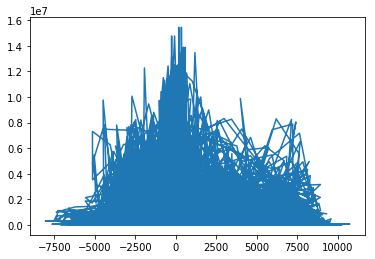

In [45]:
%matplotlib inline
plt.plot(data_eng, np.abs(fft_out_eng))
plt.show()

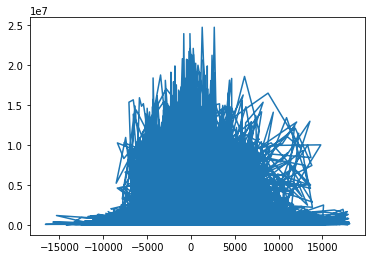

In [46]:
%matplotlib inline
plt.plot(data_hindi, np.abs(fft_out_hindi))
plt.show()

# Speech to text conversion

In [94]:
with mic as source:
    print("speak anything :")
    r.adjust_for_ambient_noise(source)
    r.pause_threshold = 180 # during testing make 180 to 15 .
    audio = r.listen(source)

speak anything :


In [95]:
try:
    text_converted = r.recognize_google(audio , language ='en-IN',show_all = True)
    print("you said :  {}".format(text_converted))
except:
    print("sorry could not recognize your voice")

you said :  {'alternative': [{'transcript': 'hello everyone I am talking about project on Google', 'confidence': 0.92995483}, {'transcript': 'hello everyone I am talking about projects on Google'}, {'transcript': 'hello everyone I am talking about project on Google Now'}], 'final': True}


# Topic modelling on generated text 

#### we are using different text on different topic for better analysis . 
#### If required you could convert the text from speech or audio file and pass it to doc ,

In [61]:
import speech_recognition as sr
import pyaudio
import matplotlib.pyplot as plt

import numpy as np

In [62]:
r = sr.Recognizer()

In [63]:
eng_speech = sr.AudioFile('iasspeech.wav')

In [64]:
eng_speech2 = sr.AudioFile('sportsspeech.wav')

In [65]:
with eng_speech as source:
    r.adjust_for_ambient_noise(source)
    audio = r.record(source )

In [66]:
with eng_speech2 as source:
    r.adjust_for_ambient_noise(source)
    audio2 = r.record(source )

In [67]:
text_eng_speech=r.recognize_google(audio )

In [68]:
text_eng_speech2=r.recognize_google(audio2 )

In [69]:
print(text_eng_speech)

is won the prestigious services among the 24 services Mike IPS examination and officers selected into the Indian Administrative Service gets exposure in reverse voltage regulator commissioner head of public sector units chief secretary Cabinet Secretary the salary of civil servants salary quotes is not easy considering the competition but not impossible for a candidate with right attitude and approach UPSC public service commission is the government agency responsible for selecting the right candidate for this service every 1024 services combined defence service exam depth of the syllabus of the first stage of exam objective is usually conducted and their skin the final result usually comes in


In [70]:
print(text_eng_speech2)

Punjab comparative physical activity games which 13 organised participation in physical sports exhaust for others between single contestants 3800 simultaneous participants of incidence is raising many contestants Mein complete simultaneously your consecutively with 1 winner in others the contest is between two sides attempting to read some sports other provider breaking many sports leagues power in some cases by players sport is generally recognised 245 sport is usually driven by a set of rules for customs which help to ensure fair competition and consistent adjudication of the winner can be determined by physical events such as going girl crossing a line first it can also be determined by George this was going Amazon the Sporting performance including objective or subjective measures such a static or performance Rochester compression


In [71]:
import nltk

In [72]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PUSHKAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PUSHKAL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [73]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [74]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [75]:
# spacy for lemmatization
import spacy

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# compile documents
doc_complete = [text_eng_speech,text_eng_speech2]
#doc6 = "The purpose of a gasoline car engine is to convert gasoline into motion so that your car can move. Currently the easiest way to create motion from gasoline is to burn the gasoline inside an engine. Therefore, a car engine is an internal combustion engine — combustion takes place internally.There are different kinds of internal combustion engines. Diesel engines are one type and gas turbine engines are another. Each has its own advantages and disadvantages."
#doc7 ="There is also the external combustion engine. The steam engine in old-fashioned trains and steam boats is the best example of an external combustion engine. The fuel (coal, wood, oil) in a steam engine burns outside the engine to create steam, and the steam creates motion inside the engine. Internal combustion is a lot more efficient than external combustion, plus an internal combustion engine is a lot smaller."
#doc8 ="The Indian Administrative Service (IAS) is the administrative arm of the All India Services.[3] Considered the premier civil service of India,[3][4] the IAS is one of the three arms of the All India Services along with the Indian Police Service (IPS) and the Indian Forest Service (IFoS). Members of these three services serve the Government of India as well as the individual states. IAS officers may also be deployed to various public sector undertakings On attaining the higher scales of the pay matrix, IAS officers may lead government departments or ministries. In these roles, IAS officers represent the country at the international level in bilateral and multilateral negotiations. If serving on a deputation, they may be employed in intergovernmental organisations such as the World Bank, the International Monetary Fund, the Asian Development Bank, the Asian Infrastructure Investment Bank, or the United Nations, or its agencies. IAS officers are also involved in the conduct of elections in India as mandated by the Election Commission of India."
#doc9 ="There are three modes of recruitment into the Indian Administrative Service. IAS officers may enter the IAS by passing the Civil Services Examination, which is conducted by the Union Public Service Commission (UPSC).[3] Officers recruited this way are called direct recruits. Some IAS officers are also recruited from the state civil services,[3] and, in rare cases, selected from non-state civil service.[3] The ratio between direct recruits and promotees is fixed at 2:1. All IAS officers, regardless of the mode of entry, are appointed by the President of India.[18] Only about 180 candidates out of over 1 million applicants, who apply through the Civil Services Examination (CSE), are successful, a success rate of less than 0.01 per cent.[10][21] As a result, the members of the service are often referred as heaven-born.[22][23] "
#doc_complete=[doc6, doc7, doc8, doc9]

In [78]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]        

In [79]:
doc_clean

[['prestigious',
  'service',
  'among',
  '24',
  'service',
  'mike',
  'ip',
  'examination',
  'officer',
  'selected',
  'indian',
  'administrative',
  'service',
  'get',
  'exposure',
  'reverse',
  'voltage',
  'regulator',
  'commissioner',
  'head',
  'public',
  'sector',
  'unit',
  'chief',
  'secretary',
  'cabinet',
  'secretary',
  'salary',
  'civil',
  'servant',
  'salary',
  'quote',
  'easy',
  'considering',
  'competition',
  'impossible',
  'candidate',
  'right',
  'attitude',
  'approach',
  'upsc',
  'public',
  'service',
  'commission',
  'government',
  'agency',
  'responsible',
  'selecting',
  'right',
  'candidate',
  'service',
  'every',
  '1024',
  'service',
  'combined',
  'defence',
  'service',
  'exam',
  'depth',
  'syllabus',
  'first',
  'stage',
  'exam',
  'objective',
  'usually',
  'conducted',
  'skin',
  'final',
  'result',
  'usually',
  'come'],
 ['punjab',
  'comparative',
  'physical',
  'activity',
  'game',
  '13',
  'organised

In [80]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(doc_clean))

print(data_words[:])

[['prestigious', 'service', 'among', 'service', 'mike', 'ip', 'examination', 'officer', 'selected', 'indian', 'administrative', 'service', 'get', 'exposure', 'reverse', 'voltage', 'regulator', 'commissioner', 'head', 'public', 'sector', 'unit', 'chief', 'secretary', 'cabinet', 'secretary', 'salary', 'civil', 'servant', 'salary', 'quote', 'easy', 'considering', 'competition', 'impossible', 'candidate', 'right', 'attitude', 'approach', 'upsc', 'public', 'service', 'commission', 'government', 'agency', 'responsible', 'selecting', 'right', 'candidate', 'service', 'every', 'service', 'combined', 'defence', 'service', 'exam', 'depth', 'syllabus', 'first', 'stage', 'exam', 'objective', 'usually', 'conducted', 'skin', 'final', 'result', 'usually', 'come'], ['punjab', 'comparative', 'physical', 'activity', 'game', 'organised', 'participation', 'physical', 'sport', 'exhaust', 'others', 'single', 'contestant', 'simultaneous', 'participant', 'incidence', 'raising', 'many', 'contestant', 'mein', 'c

In [81]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
for i in range(0,len(data_words)):
    print(trigram_mod[bigram_mod[data_words[i]]])

['prestigious', 'service', 'among', 'service', 'mike', 'ip', 'examination', 'officer', 'selected', 'indian', 'administrative', 'service', 'get', 'exposure', 'reverse', 'voltage', 'regulator', 'commissioner', 'head', 'public', 'sector', 'unit', 'chief', 'secretary', 'cabinet', 'secretary', 'salary', 'civil', 'servant', 'salary', 'quote', 'easy', 'considering', 'competition', 'impossible', 'candidate', 'right', 'attitude', 'approach', 'upsc', 'public', 'service', 'commission', 'government', 'agency', 'responsible', 'selecting', 'right', 'candidate', 'service', 'every', 'service', 'combined', 'defence', 'service', 'exam', 'depth', 'syllabus', 'first', 'stage', 'exam', 'objective', 'usually', 'conducted', 'skin', 'final', 'result', 'usually', 'come']
['punjab', 'comparative', 'physical', 'activity', 'game', 'organised', 'participation', 'physical', 'sport', 'exhaust', 'others', 'single', 'contestant', 'simultaneous', 'participant', 'incidence', 'raising', 'many', 'contestant', 'mein', 'com

In [82]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [83]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:])

[['prestigious', 'service', 'service', 'mike', 'examination', 'officer', 'select', 'indian', 'administrative', 'service', 'get', 'exposure', 'reverse', 'voltage', 'regulator', 'commissioner', 'head', 'public', 'sector', 'unit', 'chief', 'secretary', 'cabinet', 'secretary', 'salary', 'civil', 'servant', 'salary', 'easy', 'consider', 'competition', 'impossible', 'candidate', 'right', 'attitude', 'approach', 'upsc', 'public', 'service', 'commission', 'government', 'agency', 'responsible', 'select', 'right', 'candidate', 'service', 'service', 'combine', 'defence', 'service', 'exam', 'depth', 'syllabus', 'first', 'stage', 'exam', 'objective', 'usually', 'conduct', 'skin', 'final', 'result', 'usually', 'come'], ['punjab', 'comparative', 'physical', 'activity', 'game', 'organise', 'participation', 'physical', 'sport', 'exhaust', 'other', 'single', 'contestant', 'simultaneous', 'participant', 'incidence', 'raise', 'many', 'contestant', 'mein', 'complete', 'simultaneously', 'consecutively', 'wi

In [84]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 2), (39, 2), (40, 1), (41, 2), (42, 1), (43, 7), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1)]]


In [85]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:]]

[[('administrative', 1),
  ('agency', 1),
  ('approach', 1),
  ('attitude', 1),
  ('cabinet', 1),
  ('candidate', 2),
  ('chief', 1),
  ('civil', 1),
  ('combine', 1),
  ('come', 1),
  ('commission', 1),
  ('commissioner', 1),
  ('competition', 1),
  ('conduct', 1),
  ('consider', 1),
  ('defence', 1),
  ('depth', 1),
  ('easy', 1),
  ('exam', 2),
  ('examination', 1),
  ('exposure', 1),
  ('final', 1),
  ('first', 1),
  ('get', 1),
  ('government', 1),
  ('head', 1),
  ('impossible', 1),
  ('indian', 1),
  ('mike', 1),
  ('objective', 1),
  ('officer', 1),
  ('prestigious', 1),
  ('public', 2),
  ('regulator', 1),
  ('responsible', 1),
  ('result', 1),
  ('reverse', 1),
  ('right', 2),
  ('salary', 2),
  ('secretary', 2),
  ('sector', 1),
  ('select', 2),
  ('servant', 1),
  ('service', 7),
  ('skin', 1),
  ('stage', 1),
  ('syllabus', 1),
  ('unit', 1),
  ('upsc', 1),
  ('usually', 2),
  ('voltage', 1)],
 [('competition', 1),
  ('first', 1),
  ('objective', 1),
  ('usually', 1),
  ('

In [86]:
coherence_values = []
model_list = []
for num_topics in range(1, 20, 1):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word,num_topics=num_topics,random_state=0,update_every=1,chunksize=100,passes=10,alpha='auto',per_word_topics=True)
    model_list.append(lda_model)
    Perplexity_values= lda_model.log_perplexity(corpus) 
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda_values = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_model_lda.get_coherence() )
    print('num_topics :',num_topics,'Perplexity :', Perplexity_values ,'coherence:' ,coherence_lda_values  )
    


num_topics : 1 Perplexity : -4.972521180837926 coherence: 0.149211235238471
num_topics : 2 Perplexity : -4.919676909328136 coherence: 0.8845818426972918
num_topics : 3 Perplexity : -5.030302387937693 coherence: 0.6606825639666905
num_topics : 4 Perplexity : -5.120426908135414 coherence: 0.8931619324392532
num_topics : 5 Perplexity : -5.203201590289532 coherence: 0.780423636457496
num_topics : 6 Perplexity : -5.2790712154877015 coherence: 0.9135160518678048
num_topics : 7 Perplexity : -5.35031684162751 coherence: 0.9253370038052272
num_topics : 8 Perplexity : -5.4133964588104835 coherence: 0.818665041175481
num_topics : 9 Perplexity : -5.474385644348574 coherence: 0.8361641418412326
num_topics : 10 Perplexity : -5.525455972048598 coherence: 0.4798575844734816
num_topics : 11 Perplexity : -5.5765266798331705 coherence: 0.8961656255083782
num_topics : 12 Perplexity : -5.626063991180608 coherence: 0.9636654707503429
num_topics : 13 Perplexity : -5.669840652338216 coherence: 0.9777205150351

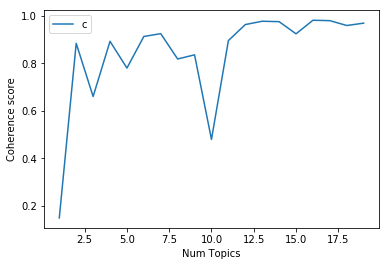

In [87]:

x = range(1,20,1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [88]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.041*"sport" + 0.026*"physical" + 0.019*"winner" + 0.019*"contestant" + '
  '0.019*"many" + 0.019*"other" + 0.019*"go" + 0.019*"determine" + '
  '0.019*"performance" + 0.011*"league"'),
 (1,
  '0.062*"service" + 0.021*"usually" + 0.021*"exam" + 0.021*"select" + '
  '0.021*"public" + 0.021*"candidate" + 0.021*"salary" + 0.021*"right" + '
  '0.021*"secretary" + 0.012*"competition"')]


In [89]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [90]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"girl" + 0.009*"go" + 0.009*"fair" + 0.009*"game" + 0.009*"generally" '
  '+ 0.009*"george" + 0.009*"event" + 0.009*"league" + 0.009*"incidence" + '
  '0.009*"ensure"'),
 (1,
  '0.095*"service" + 0.028*"exam" + 0.028*"public" + 0.028*"usually" + '
  '0.028*"salary" + 0.028*"candidate" + 0.028*"right" + 0.028*"select" + '
  '0.028*"secretary" + 0.015*"administrative"'),
 (2,
  '0.009*"service" + 0.009*"select" + 0.009*"usually" + 0.009*"exam" + '
  '0.009*"candidate" + 0.009*"public" + 0.009*"secretary" + 0.009*"salary" + '
  '0.009*"right" + 0.009*"consider"'),
 (3,
  '0.010*"sport" + 0.010*"physical" + 0.010*"go" + 0.009*"other" + '
  '0.009*"winner" + 0.009*"determine" + 0.009*"many" + 0.009*"contestant" + '
  '0.009*"performance" + 0.009*"adjudication"'),
 (4,
  '0.009*"girl" + 0.009*"go" + 0.009*"fair" + 0.009*"game" + 0.009*"generally" '
  '+ 0.009*"george" + 0.009*"event" + 0.009*"league" + 0.009*"incidence" + '
  '0.009*"ensure"'),
 (5,
  '0.009*"girl" + 0.009*"go"

In [93]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.626063991180608

Coherence Score:  0.9636654707503429
